## 154 - Gridding METAR Observations 

[Youtube](https://www.youtube.com/watch?v=M-6rLqk_XA8)

In [1]:

from siphon.catalog import TDSCatalog
from metpy.io import parse_metar_file

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [3]:
ds = cat.datasets[-2]
ds
ds.download()

In [4]:
df = parse_metar_file(ds.name)
df.head()

/home/jessica/anaconda3/lib/python3.9/site-packages/pint/quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KVKS,KVKS,32.22,-90.93,32.0,2022-09-30 20:55:00,30.0,11.0,NaN,16093.44,NaN,...,26.0,7.0,29.96,0,0,0,A01,1014.72,-5.500000,-9.526279
KC62,KC62,41.47,-85.27,306.0,2022-09-30 20:55:00,40.0,7.0,NaN,16093.44,NaN,...,18.0,8.0,30.22,0,0,0,AO2 T01810084,1023.22,-4.499513,-5.362311
KMCX,KMCX,40.72,-86.77,206.0,2022-09-30 20:55:00,80.0,5.0,NaN,16093.44,NaN,...,20.0,4.0,30.18,0,0,0,AO2 T01990044,1021.86,-4.924039,-0.868241
KRID,KRID,39.75,-84.85,348.0,2022-09-30 20:55:00,50.0,9.0,16.0,16093.44,NaN,...,20.0,8.0,30.14,0,0,0,AO2,1020.12,-6.894400,-5.785088
KMFV,KMFV,37.63,-75.77,15.0,2022-09-30 20:55:00,50.0,21.0,31.0,8046.72,-RA,...,15.0,14.0,29.98,61,0,0,AO2 P0010 60029 T01510141,1015.54,-16.086933,-13.498540


In [5]:
mapcrs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35, standard_parallels = (30, 60))
datacrs = ccrs.PlateCarree()

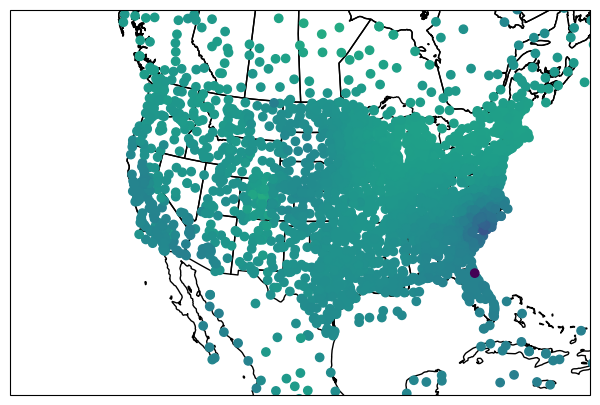

In [6]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1, projection = mapcrs)
ax.set_extent([-130, -72, 20, 55], datacrs)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.scatter(df['longitude'], df['latitude'], c = df['altimeter'], transform = datacrs, vmin = 28, vmax = 32)

In [7]:
df = df.dropna(subset = ['latitude', 'longitude', 'altimeter'])

In [8]:
from metpy.interpolate import interpolate_to_grid, remove_nan_observations

lon = df['longitude'].values
lat = df['latitude'].values
xp, yp, _ = mapcrs.transform_points(datacrs, lon, lat).T
x_masked, y_masked, alt = remove_nan_observations(xp, yp, df['altimeter'].values)
altgridx, altgridy, alt = interpolate_to_grid(x_masked, y_masked, alt, interp_type = 'cressman')

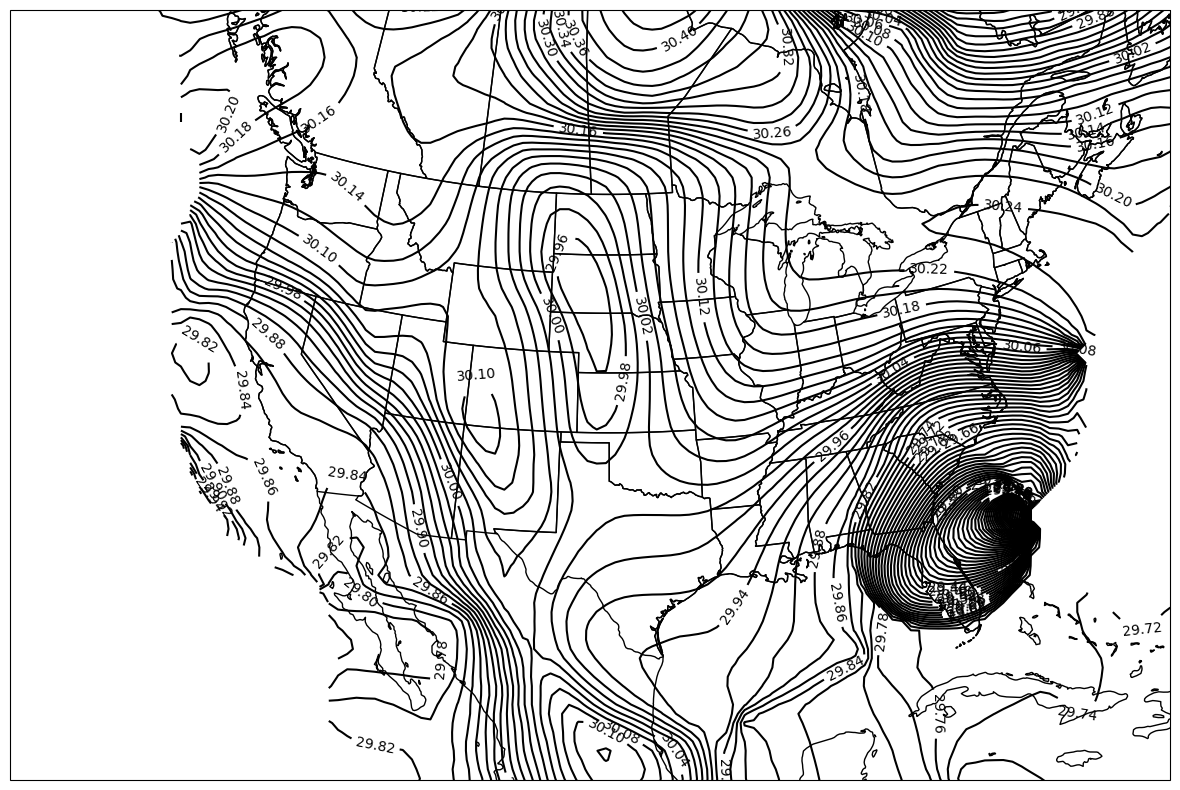

In [9]:
import numpy as np
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1, projection = mapcrs)
ax.set_extent([-130, -72, 20, 55], datacrs)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
c = ax.contour(altgridx, altgridy, alt, levels = np.arange(26, 32, 0.02), colors = 'k')
ax.clabel(c)